In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
russian_labels = {
    'Cholesterol': 'Уровень холестерина (мг/дл)',
    'ChestPainType': 'Тип боли в груди',
    'MaxHR': 'Макс. ЧСС (уд/мин)',
    'ST_Slope': 'Наклон сегмента ST',
    'Oldpeak': 'Депрессия сегмента ST при нагрузке',
    'ExerciseAngina': 'Стенокардия при физической нагрузке',
    'HeartDisease': 'Наличие сердечного заболевания',
    'Age': 'Возраст (годы)',
    'RestingBP': 'Артериальное давление в покое (мм рт. ст.)',
    'RestingECG': 'Показания ЭКГ в покое',
    'Sex': 'Пол',
    'FastingBS': 'Уровень сахара натощак',
}

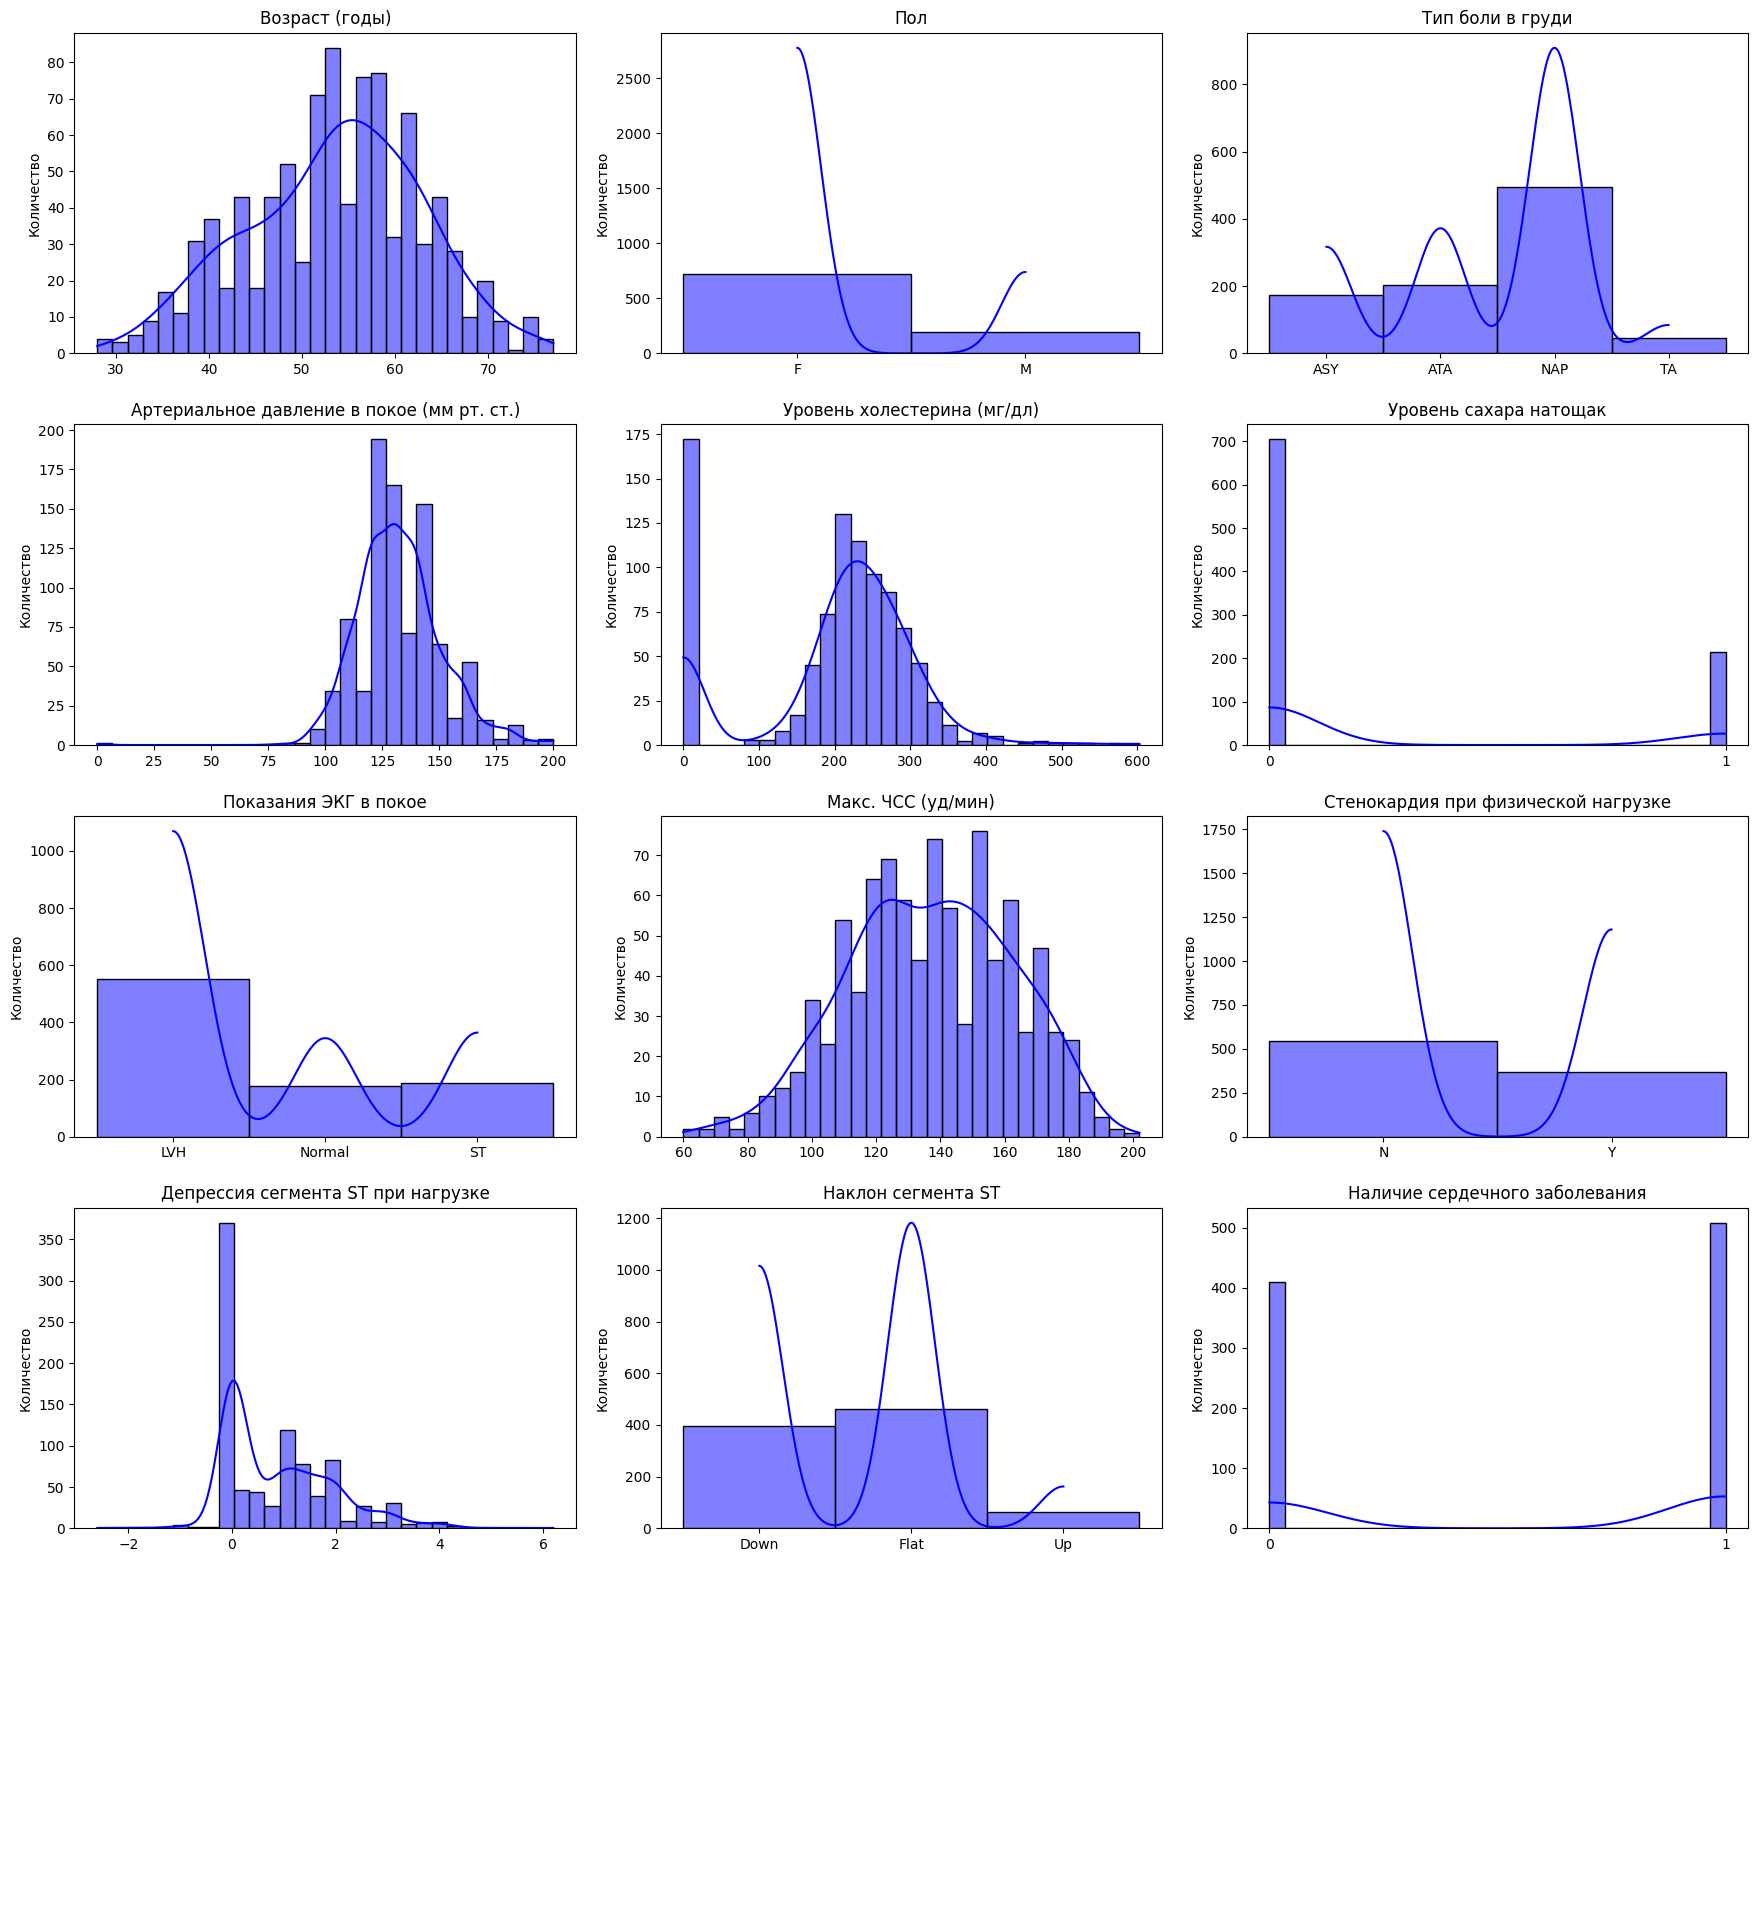

In [41]:
n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
fig.tight_layout(pad=3.0)
for i, col in enumerate(df.columns):
    ax = axes[i//n_cols, i%n_cols]
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=ax)
    ax.set_ylabel('Количество')
    ax.set_xlabel(' ')
    ax.set_title(russian_labels.get(col, col))
    if df[col].dtype == 'object' or df[col].nunique() < 5:
        ax.set_xticks(range(df[col].nunique()))
        ax.set_xticklabels([str(x) for x in sorted(df[col].unique())])

# Скрытие пустых графиков
for j in range(i+1, n_rows*n_cols):
    axes.flatten()[j].axis('off')

plt.show()

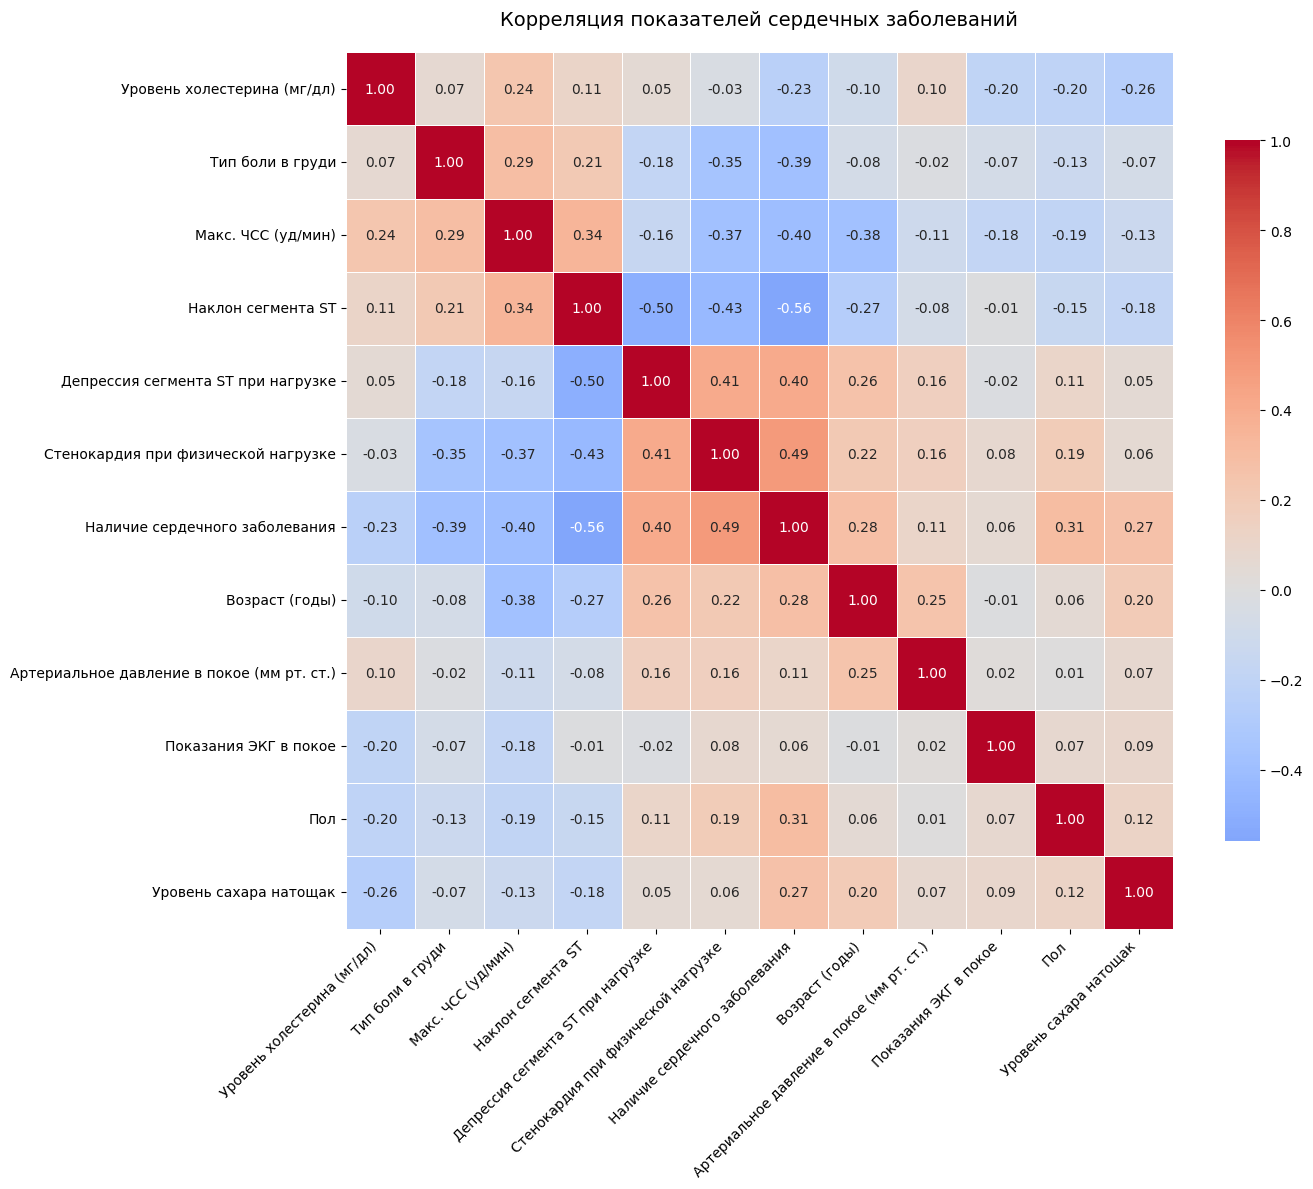

In [33]:
# Кодируем категориальные переменные
df_encoded = df.copy()
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Выбираем все колонки для анализа
numeric_cols = list(russian_labels.keys())
data = df_encoded[numeric_cols].dropna()

# Вычисляем корреляцию
corr = data.corr(method='pearson')

# Переименовываем колонки для визуализации
corr.index = [russian_labels[col] for col in corr.index]
corr.columns = [russian_labels[col] for col in corr.columns]

# Построение тепловой карты без дендрограмм
plt.figure(figsize=(14, 12))
ax = sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'location': 'right', 'shrink': 0.8}  # Цветовая шкала справа
)

# Настройка отображения
plt.title('Корреляция показателей сердечных заболеваний', pad=20, fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Убираем лишние границы
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

Сердечно-сосудистые заболевания являются одной из основных причин смертности во всем мире. Ранняя и точная диагностика критически важна для своевременного лечения и предотвращения серьезных осложнений. Мы хотим разработать модель, способную с высокой точностью предсказывать наличие сердечно-сосудистых заболеваний на основе показателей пациента.